# Data Mining Lab 1
In this lab session we will focus on the use of scientific computing libraries to efficiently process, transform, and manage data. Furthermore, we will provide best practices and introduce visualization tools for effectively conducting big data analysis and visualization.

In [103]:
# TEST necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 2. Data Preparation
In the following we will use the built-in dataset loader for 20 newsgroups from scikit-learn. Alternatively, it is possible to download the dataset manually from the website and use the sklearn.datasets.load_files function by pointing it to the 20news-bydate-train sub-folder of the uncompressed archive folder.

In order to get faster execution times for this first example we will work on a partial dataset with only 4 categories out of the 20 available in the dataset:

In [104]:
import os

datapath = 'C:/Users/Administrator/Desktop/Data_Mining/DMLab1/sentiment labelled sentences'

D = {'website': [], 'sentence': [], 'score': []}
for filename in os.listdir(datapath):
    if filename not in ['.DS_Store', 'readme']:
        with open(datapath+'/'+filename, encoding="utf-8") as fh:
            for line in fh.readlines():
                line = line[:-1].split('\t')        
                D['website'].append(filename[:-4])
                D['sentence'].append(line[0])
                D['score'].append(int(line[1]))

---

### ** >>> Exercise 1 (5 min): **  
In this exercise, please print out the *text* data for the first three samples in the dataset. (See the above code for help)

In [105]:
for i  in D['sentence'][:3]:
    print(i)

So there is no way for me to plug it in here in the US unless I go by a converter.
Good case, Excellent value.
Great for the jawbone.


---

## 3. Data Transformation
So we want to explore and understand our data a little bit better. Before we do that we definitely need to apply some transformations just so we can have our dataset in a nice format to be able to explore it freely and more efficient. Lucky for us, there are powerful scientific tools to transform our data into that tabular format we are so farmiliar with. So that is what we will do in the next section--transform our data into a nice table format.

---

### 3.1 Converting Dictionary into Pandas Dataframe
Here we will show you how to convert dictionary objects into a pandas dataframe. And by the way, a pandas dataframe is nothing more than a table magically stored for efficient information retrieval.

In [106]:
import pandas as pd
import helpers.data_mining_helpers as dmh
X = pd.DataFrame(D)

In [107]:
X[15:20]

,website,sentence,score
15,amazon_cells_labelled,Highly recommend for any one who has a blue to...,1
16,amazon_cells_labelled,I advise EVERYONE DO NOT BE FOOLED!,0
17,amazon_cells_labelled,So Far So Good!.,1
18,amazon_cells_labelled,Works great!.,1
19,amazon_cells_labelled,It clicks into place in a way that makes you w...,0


### 3.2 Familiarizing yourself with the Data

To begin to show you the awesomeness of Pandas dataframes, let us look at how to run a simple query on our dataset. We want to query for the first 10 rows (documents), and we only want to keep the `text` and `category_name` attributes or fields.

Ready for some sourcery? Brace yourselves! Let us see if we can query the first 10th record in our dataframe. For this we will use the build-in function called `loc`. This allows us to explicity define the columns you want to query.

In [108]:
# using loc (by label)
X.loc[:10, 'sentence']

0     So there is no way for me to plug it in here i...
1                           Good case, Excellent value.
2                                Great for the jawbone.
3     Tied to charger for conversations lasting more...
4                                     The mic is great.
5     I have to jiggle the plug to get it to line up...
6     If you have several dozen or several hundred c...
7           If you are Razr owner...you must have this!
8                   Needless to say, I wasted my money.
9                      What a waste of money and time!.
10                      And the sound quality is great.
Name: sentence, dtype: object

You can also use the `iloc` function to query a selection of our dataset by position. Take a look at this [great discussion](https://stackoverflow.com/questions/28757389/pandas-loc-vs-iloc-vs-ix-vs-at-vs-iat/43968774) on the differences between the `iloc` and `loc` functions.

In [109]:
# using iloc (by position)
X.iloc[:10, 1]

0    So there is no way for me to plug it in here i...
1                          Good case, Excellent value.
2                               Great for the jawbone.
3    Tied to charger for conversations lasting more...
4                                    The mic is great.
5    I have to jiggle the plug to get it to line up...
6    If you have several dozen or several hundred c...
7          If you are Razr owner...you must have this!
8                  Needless to say, I wasted my money.
9                     What a waste of money and time!.
Name: sentence, dtype: object

### ** >>> Exercise 2 (take home):** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [110]:
X.iat[3, 1]

'Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!'

---

### ** >>> Exercise 3 (5 min): **  
Try to fetch records belonging to the ```sci.med``` category, and query every 10th record. Only show the first 5 records.

In [111]:
X.loc[X['website']=='imdb_labelled'][::10][:5]

,website,sentence,score
1000,imdb_labelled,"A very, very, very slow-moving, aimless movie ...",0
1010,imdb_labelled,And those baby owls were adorable.,1
1020,imdb_labelled,I can think of no other film where something v...,1
1030,imdb_labelled,"There are massive levels, massive unlockable c...",1
1040,imdb_labelled,The very idea of it was lame - take a minor ch...,0


---

### 4.1 Missing Values

In [112]:
# check missing values
X.isnull()

,website,sentence,score
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
2995,False,False,False
2996,False,False,False
2997,False,False,False
2998,False,False,False


The `isnull` function looks through the entire dataset for null values and returns `True` wherever it finds any missing field or record. As you will see above, and as we anticipated, our dataset looks clean and all values are present, since `isnull` returns **False** for all fields and records. But let us start to get our hands dirty and build a nice little function to check each of the records, column by column, and return a nice little message telling us the amount of missing records found. This excerice will also encourage us to explore other capabilities of pandas dataframes. In most cases, the build-in functions are good enough, but as you saw above when the entire table was printed, it is impossible to tell if there are missing records just by looking at preview of records manually, especially in cases where the dataset is huge. We want a more reliable way to achieve this. Let's get to it!

In [113]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

,website,sentence,score
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0


### >>> **Exercise 4 (5 min):** 
Let's try something different. Instead of calculating missing values by column let's try to calculate the missing values in every record instead of every column.  
$Hint$ : `axis` parameter. Check the documentation for more information.

In [114]:
X.isnull().apply(lambda x: dmh.check_missing_values(x), axis='columns')

0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
                         ...                   
2995    (The amoung of missing records is: , 0)
2996    (The amoung of missing records is: , 0)
2997    (The amoung of missing records is: , 0)
2998    (The amoung of missing records is: , 0)
2999    (The amoung of missing records is: , 0)
Length: 3000, dtype: object

We have our function to check for missing records, now let us do something mischievous and insert some dummy data into the dataframe and test the reliability of our function. This dummy data is intended to corrupt the dataset. I mean this happens a lot today, especially when hackers want to hijack or corrupt a database.

We will insert a `Series`, which is basically a "one-dimensional labeled array capable of holding data of any type (integer, string, float, python objects, etc.). The axis labels are collectively called index.", into our current dataframe.

In [115]:
dummy_series = pd.Series(["dummy_record", 1], index=["website", "sentence"])

In [116]:
dummy_series

website     dummy_record
sentence               1
dtype: object

In [117]:
dummy_series.to_frame().T
# .to_frame() -> Convert Series to DataFrame
# .T          -> Transpose

,website,sentence
0,dummy_record,1


In [118]:
result_with_series = pd.concat([X, dummy_series.to_frame().T], ignore_index=True)

In [119]:
# check if the records was commited into result
len(result_with_series)

3001

Now we that we have added the record with some missing values. Let try our function and see if it can detect that there is a missing value on the resulting dataframe.

In [120]:
result_with_series.isnull().apply(lambda x: dmh.check_missing_values(x))

,website,sentence,score
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,1


Indeed there is a missing value in this new dataframe. Specifically, the missing value comes from the `category_name` attribute. As I mentioned before, there are many ways to conduct specific operations on the dataframes. In this case let us use a simple dictionary and try to insert it into our original dataframe `X`. Notice that above we are not changing the `X` dataframe as results are directly applied to the assignment variable provided. But in the event that we just want to keep things simple, we can just directly apply the changes to `X` and assign it to itself as we will do below. This modification will create a need to remove this dummy record later on, which means that we need to learn more about Pandas dataframes. This is getting intense! But just relax, everything will be fine!

In [121]:
# dummy record as dictionary format
dummy_dict = [{'website': 'dummy_record',
               'sentence': 1
              }]

In [122]:
X = pd.concat([X, pd.DataFrame(dummy_dict)], ignore_index=True)

In [123]:
len(X)

3001

In [124]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

,website,sentence,score
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,1


So now that we can see that our data has missing values, we want to remove the records with missing values. The code to drop the record with missing that we just added, is the following:

In [125]:
X.dropna(inplace=True)

... and now let us test to see if we gotten rid of the records with missing values. 

In [126]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

,website,sentence,score
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0


In [127]:
len(X)

3000

And we are back with our original dataset, clean and tidy as we want it. That's enough on how to deal with missing values, let us now move unto something more fun. 

But just in case you want to learn more about how to deal with missing data, refer to the official [Pandas documentation](http://pandas.pydata.org/pandas-docs/stable/missing_data.html#missing-data).

---

### >>> **Exercise 5 (take home)** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [128]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


In [129]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

In [130]:
# ANS: Because isnull() returns true when values are NA. NA values, like None, numpy.NaN. 
#      Yet items of index 2, 3 are both strings, also, index 5 is an empty string, thus they are not NA values.

---

### 4.2 Dealing with Duplicate Data
Dealing with duplicate data is just as painful as dealing with missing data. The worst case is that you have duplicate data that has missing values. But let us not get carried away. Let us stick with the basics. As we have learned in our Data Mining course, duplicate data can occur because of many reasons. The majority of the times it has to do with how we store data or how we collect and merge data. For instance, we may have collected and stored a tweet, and a retweet of that same tweet as two different records; this results in a case of data duplication; the only difference being that one is the original tweet and the other the retweeted one. Here you will learn that dealing with duplicate data is not as challenging as missing values. But this also all depends on what you consider as duplicate data, i.e., this all depends on your criteria for what is considered as a duplicate record and also what type of data you are dealing with. For textual data, it may not be so trivial as it is for numerical values or images. Anyhow, let us look at some code on how to deal with duplicate records in our `X` dataframe.

First, let us check how many duplicates we have in our current dataset. Here is the line of code that checks for duplicates; it is very similar to the `isnull` function that we used to check for missing values. 

In [131]:
X.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2995    False
2996    False
2997    False
2998    False
2999    False
Length: 3000, dtype: bool

We can also check the sum of duplicate records by simply doing:

In [132]:
sum(X.duplicated())

17

Based on that output, you may be asking why did the `duplicated` operation only returned one single column that indicates whether there is a duplicate record or not. So yes, all the `duplicated()` operation does is to check per records instead of per column. That is why the operation only returns one value instead of three values for each column. It appears that we don't have any duplicates since none of our records resulted in `True`. If we want to check for duplicates as we did above for some particular column, instead of all columns, we do something as shown below. As you may have noticed, in the case where we select some columns instead of checking by all columns, we are kind of lowering the criteria of what is considered as a duplicate record. So let us only check for duplicates by only checking the `text` attribute. 

In [133]:
sum(X.duplicated('sentence'))

17

Now let us create some duplicated dummy records and append it to the main dataframe `X`. Subsequenlty, let us try to get rid of the duplicates.

In [134]:
dummy_duplicate_dict = [{
                             'website': 'dummy record',
                             'sentence': 1, 
                             'score': "dummy category"
                        },
                        {
                             'website': 'dummy record',
                             'sentence': 1, 
                             'score': "dummy category"
                        }]

In [135]:
X = pd.concat([X, pd.DataFrame(dummy_duplicate_dict)], ignore_index=True)

In [136]:
len(X)

3002

In [137]:
sum(X.duplicated('sentence'))

18

We have added the dummy duplicates to `X`. Now we are faced with the decision as to what to do with the duplicated records after we have found it. In our case, we want to get rid of all the duplicated records without preserving a copy. We can simply do that with the following line of code:

In [138]:
X.drop_duplicates(keep=False, inplace=True) # inplace applies changes directly on our dataframe

In [139]:
len(X)

2966

---

## 5.  Data Preprocessing
In the Data Mining course we learned about the many ways of performing data preprocessing. In reality, the list is quiet general as the specifics of what data preprocessing involves is too much to cover in one course. This is especially true when you are dealing with unstructured data, as we are dealing with in this particular notebook. But let us look at some examples for each data preprocessing technique that we learned in the class. We will cover each item one by one, and provide example code for each category. You will learn how to perform each of the operations, using Pandas, that cover the essentials to Preprocessing in Data Mining. We are not going to follow any strict order, but the items we will cover in the preprocessing section of this notebook are as follows:

- Aggregation
- Sampling
- Dimensionality Reduction
- Feature Subset Selection
- Feature Creation
- Discretization and Binarization
- Attribute Transformation

---

### 5.1 Sampling
The first concept that we are going to cover from the above list is sampling. Sampling refers to the technique used for selecting data. The functionalities that we use to  selected data through queries provided by Pandas are actually basic methods for sampling. The reasons for sampling are sometimes due to the size of data -- we want a smaller subset of the data that is still representatitive enough as compared to the original dataset. 

We don't have a problem of size in our current dataset since it is just a couple thousand records long. But if we pay attention to how much content is included in the `text` field of each of those records, you will realize that sampling may not be a bad idea after all. In fact, we have already done some sampling by just reducing the records we are using here in this notebook; remember that we are only using four categories from the all the 20 categories available. Let us get an idea on how to sample using pandas operations.

In [140]:
X_sample = X.sample(n=1000) #random state

In [141]:
X_sample[0:5]

,website,sentence,score
974,amazon_cells_labelled,This phone tries very hard to do everything bu...,0.0
2586,yelp_labelled,"All in all, I can assure you I'll be back.",1.0
807,amazon_cells_labelled,The reception through this headset is excellent.,1.0
1290,imdb_labelled,"Camerawork - again, bad.",0.0
247,amazon_cells_labelled,Nice headphones for the price and they work gr...,1.0


---

### >>> Exercise 6 (take home):
Notice any changes to the `X` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

In [142]:
# ANS: The output of X are now randomly arranged, whereas those of the previous one always appear by sequence.

---

Let's do something cool here while we are working with sampling! Let us look at the distribution of categories in both the sample and original dataset. Let us visualize and analyze the disparity between the two datasets. To generate some visualizations, we are going to use `matplotlib` python library. With matplotlib, things are faster and compatability-wise it may just be the best visualization library for visualizing content extracted from dataframes and when using Jupyter notebooks. Let's take a loot at the magic of `matplotlib` below.

In [143]:
import matplotlib.pyplot as plt
%matplotlib inline

imdb_labelled            994
yelp_labelled            992
amazon_cells_labelled    980
Name: website, dtype: int64


<AxesSubplot:title={'center':'website distribution'}>

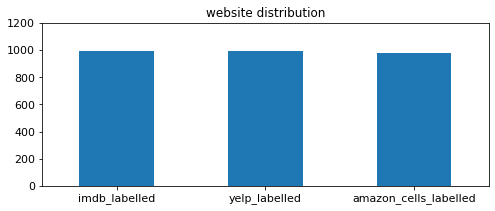

In [144]:
print(X.website.value_counts())

# plot barchart for X
X.website.value_counts().plot(kind = 'bar',
                                    title = 'website distribution',
                                    ylim = [0, 1200],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

amazon_cells_labelled    334
yelp_labelled            333
imdb_labelled            333
Name: website, dtype: int64


<AxesSubplot:title={'center':'website distribution'}>

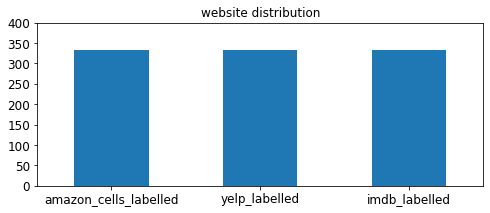

In [145]:
print(X_sample.website.value_counts())

# plot barchart for X_sample
X_sample.website.value_counts().plot(kind = 'bar',
                                           title = 'website distribution',
                                           ylim = [0, 400], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

### >>> **Exercise 7 (5 min):**
Notice that for the `ylim` parameters we hardcoded the maximum value for y. Is it possible to automate this instead of hard-coding it? How would you go about doing that? (Hint: look at code above for clues)

<AxesSubplot:title={'center':'website distribution'}>

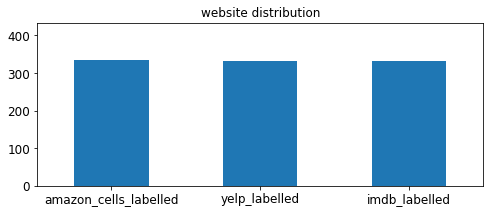

In [146]:
upper_bound = max(X_sample.website.value_counts())+100
X_sample.website.value_counts().plot(kind = 'bar', title = 'website distribution', ylim = [0, upper_bound], rot = 0, fontsize = 12, figsize = (8,3))

---

### >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

![alt txt](https://i.imgur.com/9eO431H.png)

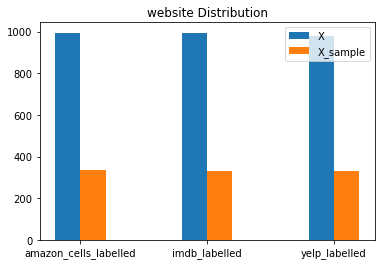

In [147]:
import numpy as np 
import matplotlib.pyplot as plt 
XX = ['amazon_cells_labelled', 'imdb_labelled', 'yelp_labelled']

X_axis = np.arange(3)
  
plt.bar(X_axis - 0.1, X.website.value_counts(), 0.2, label = 'X')
plt.bar(X_axis + 0.1, X_sample.website.value_counts(), 0.2, label = 'X_sample')
  
plt.xticks(X_axis, XX)
plt.title('website Distribution')
plt.legend()

In [148]:
import nltk

In [149]:
# takes a like a minute or two to process
X['unigrams'] = X['sentence'].apply(lambda x: dmh.tokenize_text(x))

In [150]:
X[0:4]["unigrams"]

0    [So, there, is, no, way, for, me, to, plug, it...
1                 [Good, case, ,, Excellent, value, .]
2                        [Great, for, the, jawbone, .]
3    [Tied, to, charger, for, conversations, lastin...
Name: unigrams, dtype: object

In [151]:
X[0:4]

,website,sentence,score,unigrams
0,amazon_cells_labelled,So there is no way for me to plug it in here i...,0.0,"[So, there, is, no, way, for, me, to, plug, it..."
1,amazon_cells_labelled,"Good case, Excellent value.",1.0,"[Good, case, ,, Excellent, value, .]"
2,amazon_cells_labelled,Great for the jawbone.,1.0,"[Great, for, the, jawbone, .]"
3,amazon_cells_labelled,Tied to charger for conversations lasting more...,0.0,"[Tied, to, charger, for, conversations, lastin..."


---

### 5.3 Feature subset selection
Okay, so we are making some headway here. Let us now make things a bit more interesting. We are going to do something different from what we have been doing thus far. We are going use a bit of everything that we have learned so far. Briefly speaking, we are going to move away from our main dataset (one form of feature subset selection), and we are going to generate a document-term matrix from the original dataset. In other words we are going to be creating something like this. 

In [152]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.sentence) #learn the vocabulary and return document-term matrix
print(X_counts[0])

  (0, 4159)	1
  (0, 4543)	1
  (0, 2426)	1
  (0, 3042)	1
  (0, 4985)	1
  (0, 1828)	1
  (0, 2808)	1
  (0, 4607)	1
  (0, 3385)	1
  (0, 2431)	1
  (0, 2313)	2
  (0, 2157)	1
  (0, 4529)	1
  (0, 4833)	1
  (0, 4791)	1
  (0, 1981)	1
  (0, 646)	1
  (0, 1012)	1


---

### **>>> Exercise 9 (5 min):**
Let's analyze the first record of our X dataframe with the new analyzer we have just built. Go ahead try it!

In [153]:
test = count_vect.build_analyzer()
test(X['sentence'][0])

['so',
 'there',
 'is',
 'no',
 'way',
 'for',
 'me',
 'to',
 'plug',
 'it',
 'in',
 'here',
 'in',
 'the',
 'us',
 'unless',
 'go',
 'by',
 'converter']

---

Now let us look at the term-document matrix we built above.

In [154]:
# We can check the shape of this matrix by:
X_counts.shape

(2966, 5153)

In [155]:
# We can obtain the feature names of the vectorizer, i.e., the terms
# usually on the horizontal axis
count_vect.get_feature_names_out()[0:10]

array(['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17'],
      dtype=object)

Above we can see the features found in the all the documents `X`, which are basically all the terms found in all the documents. As I said earlier, the transformation is not in the pretty format (table) we saw above -- the term-document matrix. We can do many things with the `count_vect` vectorizer and its transformation `X_counts`. You can find more information on other cool stuff you can do with the [CountVectorizer](http://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction). 

Now let us try to obtain something that is as close to the pretty table I provided above. Before jumping into the code for doing just that, it is important to mention that the reason for choosing the `fit_transform` for the `CountVectorizer` is that it efficiently learns the vocabulary dictionary and returns a term-document matrix.

In the next bit of code, we want to extract the first five articles and transform them into document-term matrix, or in this case a 2-dimensional array. Here it goes. 

In [156]:
# we convert from sparse array to normal array
X_counts[3:4, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int64)

---

### **>>> Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [157]:
for i in X_counts[3:4, 0:100].nonzero():
    print(count_vect.get_feature_names_out()[i][0])

00
45


To get you started in thinking about how to better analyze your data or transformation, let us look at this nice little heat map of our term-document matrix. It may come as a surpise to see the gems you can mine when you start to look at the data from a different perspective. Visualization are good for this reason.

In [158]:
# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]

In [159]:
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]

In [160]:
plot_z = X_counts[0:20, 0:20].toarray()
plot_z

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0,

For the heat map, we are going to use another visualization library called `seaborn`. It's built on top of matplotlib and closely integrated with pandas data structures. One of the biggest advantages of seaborn is that its default aesthetics are much more visually appealing than matplotlib. See comparison below.

![alt txt](https://i.imgur.com/1isxmIV.png)

The other big advantage of seaborn is that seaborn has some built-in plots that matplotlib does not support. Most of these can eventually be replicated by hacking away at matplotlib, but they’re not built in and require much more effort to build.

So without further ado, let us try it now!

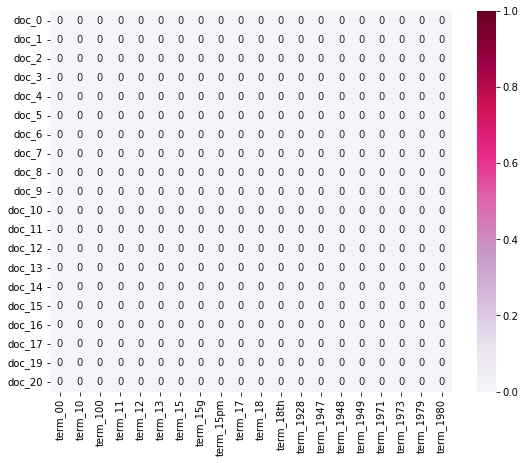

In [161]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

Check out more beautiful color palettes here: https://python-graph-gallery.com/197-available-color-palettes-with-matplotlib/

---

### **>>> Exercise 11 (take home):** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

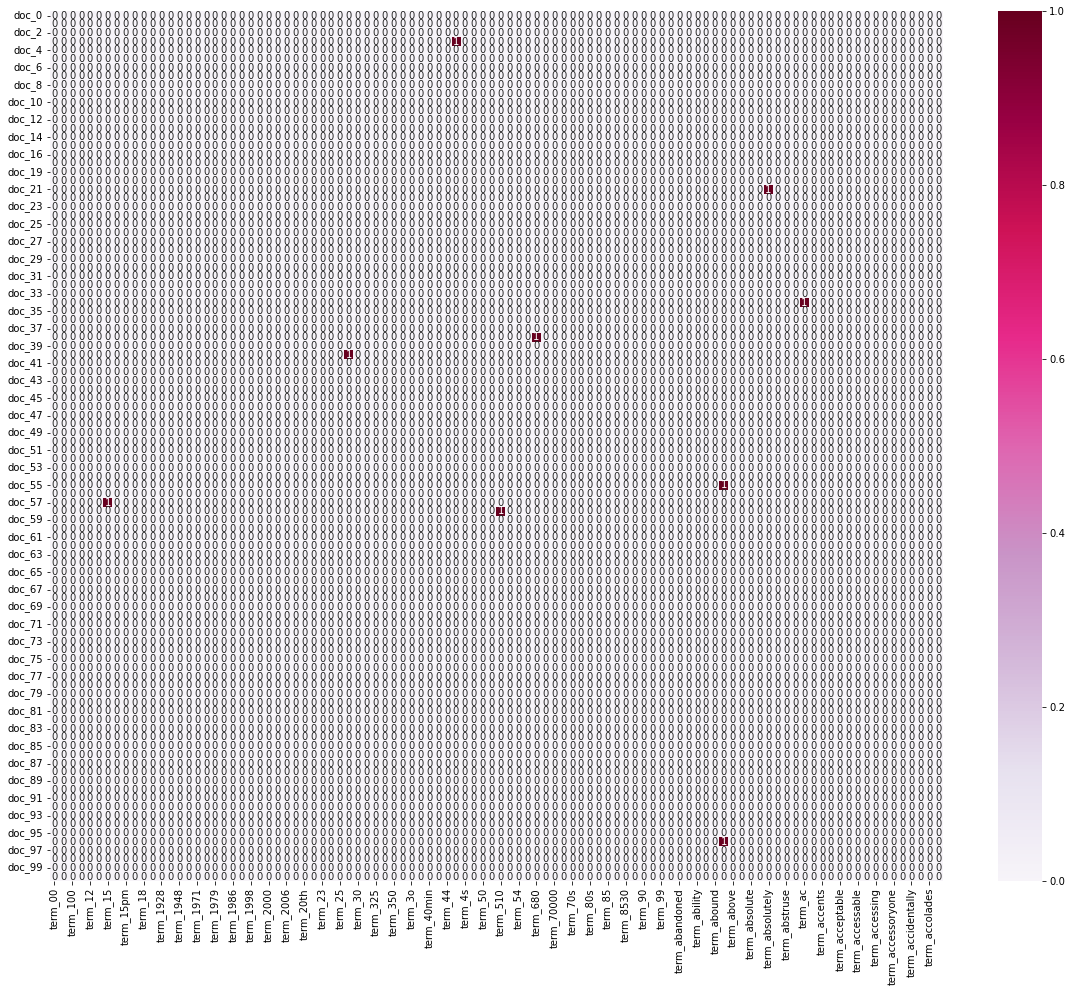

In [162]:
import seaborn as sns

X_counts = X_counts.astype('float32')

plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[:100]]
plot_y = ["doc_"+ str(i) for i in list(X.index)[:100]]
plot_z = X_counts[:100, :100].toarray()

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y, dtype='float32')
plt.subplots(figsize=(20, 16))
ax = sns.heatmap(df_todraw, cmap="PuRd", vmin=0, vmax=1, annot=True)


---

[PCA Algorithm](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

**Input:** Raw term-vector matrix

**Output:** Projections 

In [163]:
from sklearn.decomposition import PCA

In [164]:
X_reduced = PCA(n_components = 2).fit_transform(X_counts.toarray())

In [165]:
X_reduced.shape

(2966, 2)

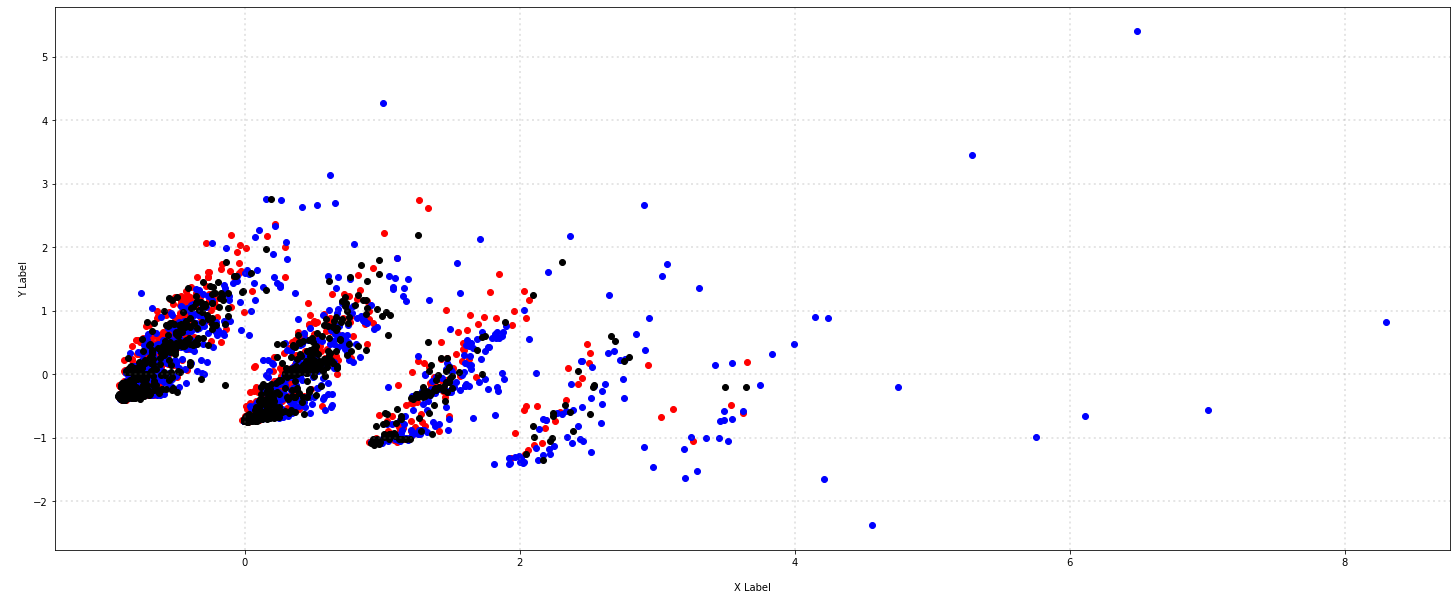

In [166]:
col = ['red', 'blue', 'black']
categories = ['amazon_cells_labelled', 'imdb_labelled', 'yelp_labelled']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, category in zip(col, categories):
    xs = X_reduced[X['website'] == category].T[0]
    ys = X_reduced[X['website'] == category].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

From the 2D visualization above, we can see a slight "hint of separation in the data"; i.e., they might have some special grouping by category, but it is not immediately clear. The PCA was applied to the raw frequencies and this is considered a very naive approach as some words are not really unique to a document. Only categorizing by word frequency is considered a "bag of words" approach. Later on in the course you will learn about different approaches on how to create better features from the term-vector matrix, such as term-frequency inverse document frequency so-called TF-IDF.

---

### >>> Exercise 12 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

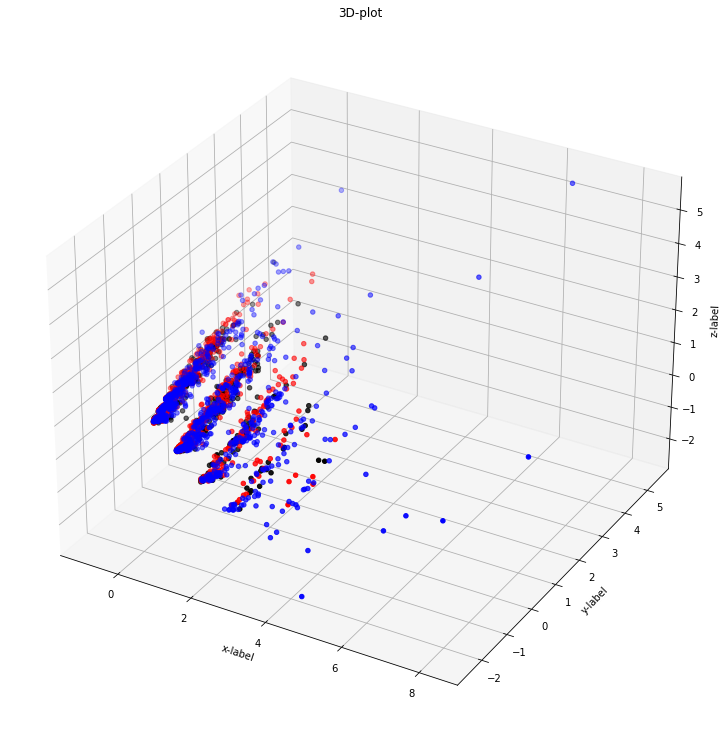

In [167]:
import numpy as np
import matplotlib.pyplot as plt

col = ['red', 'blue', 'black']
fig = plt.figure(figsize = (20, 13))
ax = fig.add_subplot(projection='3d')

for c, category in zip(col, categories):
    x = X_reduced[X['website'] == category].T[0]
    y = X_reduced[X['website'] == category].T[1]
    z = X_reduced[X['website'] == category].T[1]
    ax.scatter(x, y, z, c = c, marker='o')


ax.set_xlabel('x-label')
ax.set_ylabel('y-label')
ax.set_zlabel('z-label')
# ax.plot(x, y, z)
plt.title('3D-plot')
plt.show()


---

### 5.5 Attribute Transformation / Aggregation
We can do other things with the term-vector matrix besides applying dimensionality reduction technique to deal with sparsity problem. Here we are going to generate a simple distribution of the words found in all the entire set of articles. Intuitively, this may not make any sense, but in data science sometimes we take some things for granted, and we just have to explore the data first before making any premature conclusions. On the topic of attribute transformation, we will take the word distribution and put the distribution in a scale that makes it easy to analyze patterns in the distrubution of words. Let us get into it!

First, we need to compute these frequencies for each term in all documents. Visually speaking, we are seeking to add values of the 2D matrix, vertically; i.e., sum of each column. You can also refer to this process as aggregation, which we won't explore further in this notebook because of the type of data we are dealing with. But I believe you get the idea of what that includes.  

![alt txt](https://docs.google.com/drawings/d/e/2PACX-1vTMfs0zWsbeAl-wrpvyCcZqeEUf7ggoGkDubrxX5XtwC5iysHFukD6c-dtyybuHnYigiRWRlRk2S7gp/pub?w=750&h=412)

In [168]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:500,j].toarray()))

In [169]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

In [170]:
term_frequencies[:150] #sum of first term

array([ 1., 34.,  3.,  2.,  4.,  3.,  3.,  1.,  1.,  2.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  9.,  1.,  2.,
        1.,  1.,  2.,  1.,  1.,  1.,  2.,  1.,  7.,  1.,  1.,  3.,  1.,
        1.,  1.,  5.,  1.,  1.,  1.,  2.,  1.,  1.,  4.,  1.,  3.,  1.,
        1.,  1.,  1.,  2.,  1.,  1.,  1.,  2.,  1.,  1.,  1.,  1.,  1.,
        1.,  7.,  1.,  1.,  1.,  1.,  1.,  5.,  4.,  1., 85.,  7.,  1.,
        1.,  1., 21.,  1.,  1.,  2.,  1.,  1.,  1.,  2.,  1.,  2.,  1.,
        1.,  1.,  1.,  1.,  1.,  2.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  2.,  1.,  2.,  1.,  1.,  2.,  1.,  2.,  3., 43.,
        7.,  1.,  1.,  1.,  1., 10., 19.,  3.,  3.,  1., 16.,  1.,  1.,
        2.,  1.,  1.,  2.,  3.,  4.,  2.,  1.,  1.,  1.,  1.,  1.,  6.,
        1.,  1.,  2.,  4.,  3.,  1.,  1.], dtype=float32)

In [171]:
plt.subplots(figsize=(500, 50))
g = sns.barplot(x=count_vect.get_feature_names_out()[:500], 
            y=term_frequencies[:500])
g.set_xticklabels(count_vect.get_feature_names_out()[:500], rotation = 90);

---

### >>> **Exercise 13 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [172]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: plotly in c:\users\administrator\anaconda3\lib\site-packages (5.10.0)



In [173]:
import pandas as pd
D = {}
D['terms'] = [i for i in count_vect.get_feature_names_out()[:200]]
D['frequencies'] = [i for i in term_frequencies[:200]]
D['color'] = [i for i in term_frequencies[:200]]
df = pd.DataFrame(D)

In [174]:
import plotly.express as px

fig = px.bar(df, x = 'terms', y = 'frequencies', height=500, color = 'color')
fig.show()

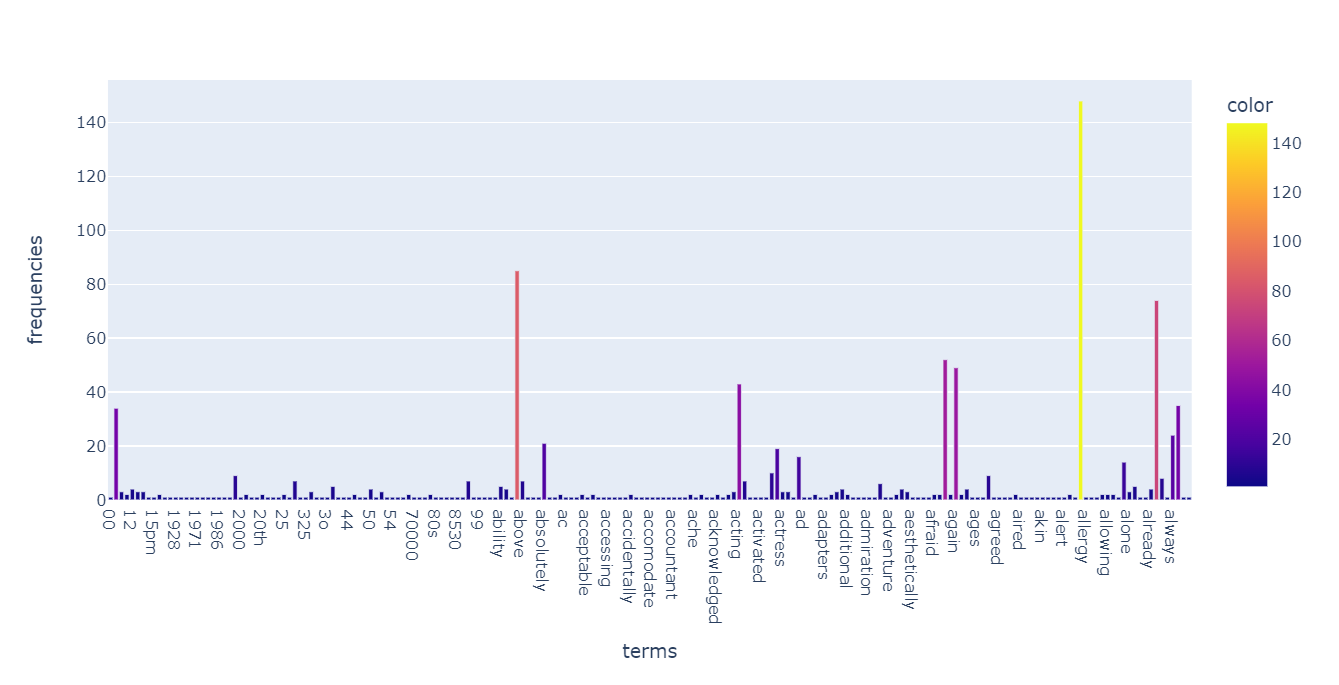

---

### >>> **Exercise 14 (take home):** 
The chart above contains all the vocabulary, and it's computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 


In [175]:
D2 = {}
D2['terms'] = [i for i in count_vect.get_feature_names_out()[:100]]
D2['frequencies'] = [i for i in term_frequencies[:100]]
D2['color'] = [i for i in term_frequencies[:100]]
df = pd.DataFrame(D2)

fig = px.bar(df, x = 'terms', y = 'frequencies', height=500, color = 'color')
fig.show()

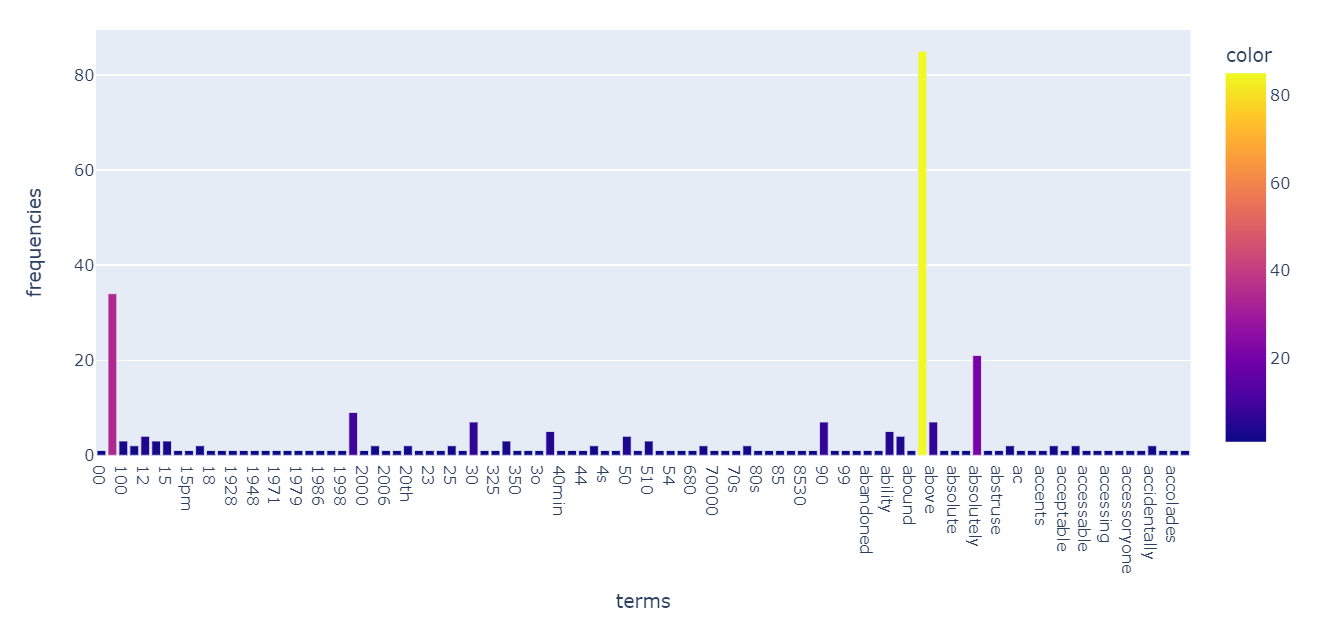

---

### >>> **Exercise 15 (take home):** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

In [74]:
temp = [(i, v) for i, v in zip(count_vect.get_feature_names_out()[:200], term_frequencies[:200])]
temp = sorted(temp, key=lambda x: x[1], reverse=True)

D2 = {}
D2['terms'] = [i[0] for i in temp[:]]
D2['frequencies'] = [i[1] for i in temp[:]]
D2['color'] = [i for i in temp[:]]

df2 = pd.DataFrame(D2)

fig = px.bar(df2, x = 'terms', y = 'frequencies', height=500, color = 'color')
fig.show()


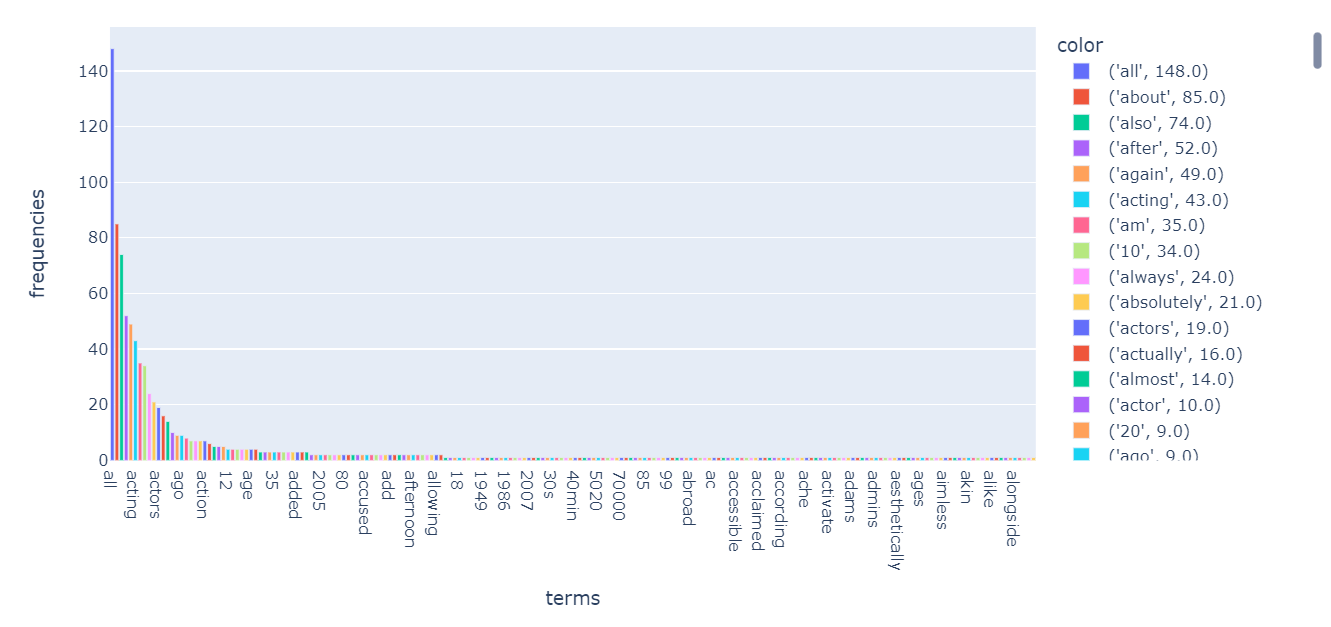

---

Since we already have those term frequencies, we can also transform the values in that vector into the log distribution. All we need is to import the `math` library provided by python and apply it to the array of values of the term frequency vector. This is a typical example of attribute transformation. Let's go for it. The log distribution is a technique to visualize the term frequency into a scale that makes you easily visualize the distribution in a more readable format. In other words, the variations between the term frequencies are now easy to observe. Let us try it out!

In [75]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

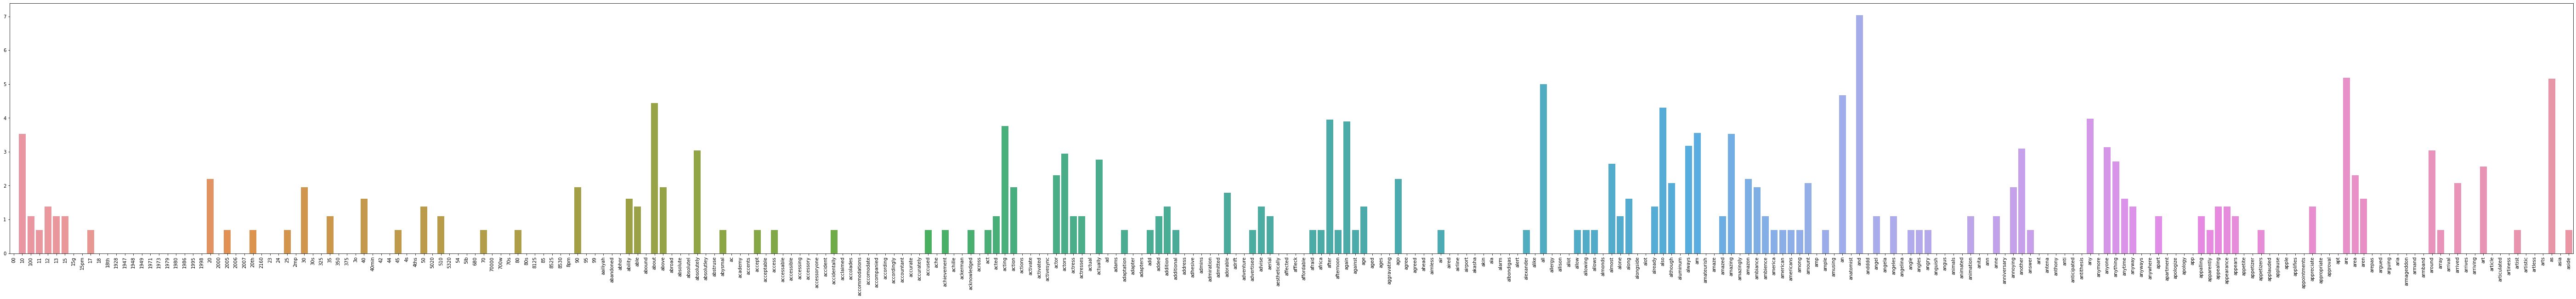

In [76]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

Besides observing a complete transformation on the disrtibution, notice the scale on the y-axis. The log distribution in our unsorted example has no meaning, but try to properly sort the terms by their frequency, and you will see an interesting effect. Go for it!

---

### 5.6 Discretization and Binarization
In this section we are going to discuss a very important pre-preprocessing technique used to transform the data, specifically categorical values, into a format that satisfies certain criteria required by particular algorithms. Given our current original dataset, we would like to transform one of the attributes, `category_name`, into four binary attributes. In other words, we are taking the category name and replacing it with a `n` asymmetric binary attributes. The logic behind this transformation is discussed in detail in the recommended Data Mining text book (please refer to it on page 58). People from the machine learning community also refer to this transformation as one-hot encoding, but as you may become aware later in the course, these concepts are all the same, we just have different prefrence on how we refer to the concepts. Let us take a look at what we want to achieve in code. 

In [77]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [78]:
mlb = preprocessing.LabelBinarizer()

In [79]:
mlb.fit(X.website)

LabelBinarizer()

In [80]:
X['bin_web'] = mlb.transform(X['website']).tolist()

In [81]:
X[0:9]

,website,sentence,score,unigrams,bin_web
0,amazon_cells_labelled,So there is no way for me to plug it in here i...,0.0,"[So, there, is, no, way, for, me, to, plug, it...","[1, 0, 0]"
1,amazon_cells_labelled,"Good case, Excellent value.",1.0,"[Good, case, ,, Excellent, value, .]","[1, 0, 0]"
2,amazon_cells_labelled,Great for the jawbone.,1.0,"[Great, for, the, jawbone, .]","[1, 0, 0]"
3,amazon_cells_labelled,Tied to charger for conversations lasting more...,0.0,"[Tied, to, charger, for, conversations, lastin...","[1, 0, 0]"
4,amazon_cells_labelled,The mic is great.,1.0,"[The, mic, is, great, .]","[1, 0, 0]"
5,amazon_cells_labelled,I have to jiggle the plug to get it to line up...,0.0,"[I, have, to, jiggle, the, plug, to, get, it, ...","[1, 0, 0]"
6,amazon_cells_labelled,If you have several dozen or several hundred c...,0.0,"[If, you, have, several, dozen, or, several, h...","[1, 0, 0]"
7,amazon_cells_labelled,If you are Razr owner...you must have this!,1.0,"[If, you, are, Razr, owner, ..., you, must, ha...","[1, 0, 0]"
8,amazon_cells_labelled,"Needless to say, I wasted my money.",0.0,"[Needless, to, say, ,, I, wasted, my, money, .]","[1, 0, 0]"


Take a look at the new attribute we have added to the `X` table. You can see that the new attribute, which is called `bin_category`, contains an array of 0's and 1's. The `1` is basically to indicate the position of the label or category we binarized. If you look at the first two records, the one is places in slot 2 in the array; this helps to indicate to any of the algorithms which we are feeding this data to, that the record belong to that specific category. 

Attributes with **continuous values** also have strategies to tranform the data; this is usually called **Discretization** (please refer to the text book for more inforamation).

---

### >>> **Exercise 16 (take home):**
Try to generate the binarization using the `category_name` column instead. Does it work?

In [82]:
X_counts = X_counts.astype('int64')

In [83]:
mlb.fit(X.sentence)

LabelBinarizer()

In [84]:
X['Excercise 16'] = mlb.transform(X['sentence']).tolist()
X[0:9]

,website,sentence,score,unigrams,bin_web,Excercise 16
0,amazon_cells_labelled,So there is no way for me to plug it in here i...,0.0,"[So, there, is, no, way, for, me, to, plug, it...","[1, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,amazon_cells_labelled,"Good case, Excellent value.",1.0,"[Good, case, ,, Excellent, value, .]","[1, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,amazon_cells_labelled,Great for the jawbone.,1.0,"[Great, for, the, jawbone, .]","[1, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,amazon_cells_labelled,Tied to charger for conversations lasting more...,0.0,"[Tied, to, charger, for, conversations, lastin...","[1, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,amazon_cells_labelled,The mic is great.,1.0,"[The, mic, is, great, .]","[1, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
5,amazon_cells_labelled,I have to jiggle the plug to get it to line up...,0.0,"[I, have, to, jiggle, the, plug, to, get, it, ...","[1, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
6,amazon_cells_labelled,If you have several dozen or several hundred c...,0.0,"[If, you, have, several, dozen, or, several, h...","[1, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
7,amazon_cells_labelled,If you are Razr owner...you must have this!,1.0,"[If, you, are, Razr, owner, ..., you, must, ha...","[1, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
8,amazon_cells_labelled,"Needless to say, I wasted my money.",0.0,"[Needless, to, say, ,, I, wasted, my, money, .]","[1, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


# 6. Data Exploration

Sometimes you need to take a peek at your data to understand the relationships in your dataset. Here, we will focus in a similarity example. Let's take 3 documents and compare them.

In [85]:
# We retrieve 3 sentences for a random record
document_to_transform_1 = []
random_record_1 = X.iloc[50]
random_record_1 = random_record_1['sentence']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = X.iloc[100]
random_record_2 = random_record_2['sentence']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = X.iloc[150]
random_record_3 = random_record_3['sentence']
document_to_transform_3.append(random_record_3)

Let's look at our emails.

In [86]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

['good protection and does not make phone too bulky.']
['Buyer Beware, you could flush money right down the toilet.']
['Audio Quality is poor, very poor.']


In [87]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [88]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.000000
Cosine Similarity using count bw 1 and 3: 0.000000
Cosine Similarity using count bw 2 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


As expected, cosine similarity between a sentence and itself is 1. Between 2 entirely different sentences, it will be 0. 

We can assume that we have the more common features in the documents 1 and 3 than in documents 1 and 2. This reflects indeed in a higher similarity than that of sentences 1 and 3. 


---

## . References

- Pandas cook book ([Recommended for starters](http://pandas.pydata.org/pandas-docs/stable/cookbook.html))
- [Pang-Ning Tan, Michael Steinbach, Vipin Kumar, Introduction to Data Mining, Addison Wesley](https://dl.acm.org/citation.cfm?id=1095618)

>New data visualizations

In [89]:
pip install bokeh

Note: you may need to restart the kernel to use updated packages.


In [90]:
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook 
import numpy as np

x = np.arange(0, 200)
x = np.arange(0, 200)
radii = np.array(term_frequencies[:200])
# colors = ['#%02x%02x%02x' % (r, g, 150) for r, g in zip(np.floor(50+2*x), np.floor(30+2*y))]

In [91]:
output_notebook()

Loading BokehJS ...

In [92]:
p = figure()
p.circle(x, y, radius = radii, fill_alpha = 0.6, line_color=None)
show(p)

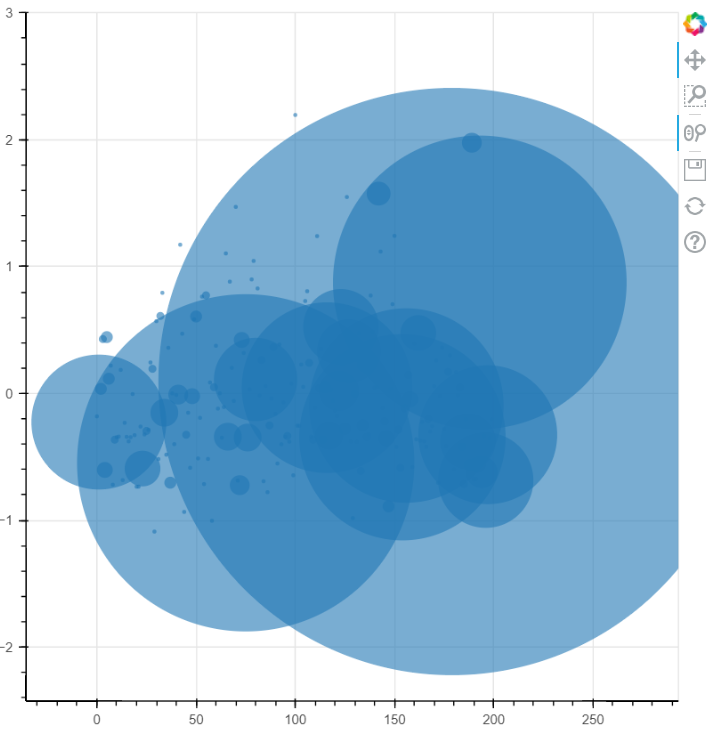

# TF-IDF features

In [93]:
 from sklearn.feature_extraction.text import TfidfVectorizer

In [94]:
vectorizer = TfidfVectorizer()
TF_idf = vectorizer.fit_transform(X['sentence'])


# Naive Bayes classifier

In [95]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

In [96]:
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

### Use the TF-IDF features 

In [1]:

X1 = TF_idf
y = X['website']
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y, test_size=0.3, random_state=0)

NameError: name 'TF_idf' is not defined

In [98]:
model = MultinomialNB()
model.fit(X1_train,y1_train)
model.predict(X1_test)
model.predict_proba(X1_test)
model.score(X1_test,y1_test)

0.851685393258427

### Use the word frequency features

In [99]:
X2 = X_counts
y = X['website']
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.3, random_state=0)

In [100]:
model = MultinomialNB()
model.fit(X2_train,y2_train)
model.predict(X2_test)
model.predict_proba(X2_test)
model.score(X2_test,y2_test)

0.8505617977528089

### Comments: According to the results above, we can observe that using TF-IDF features as training data has a higher score of accuracy on the given test data and labels caompared to that of word frequency features. I think the reason is that the denominator of TF-IDF is (total documants number/ number of documents contain the term), which takes the whole dataset into consideration and thus being more accurate than only consider each term's frequency.